# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

## 1.

For the purpose of this derivation, I will use the following cost function:

$$ cost(w, (x^{(i)}, y^{(i)})) = \frac{1}{2} * (\hat{y}^{(i)} - y^{(i)})^2 $$

where $i$ represents one sample from the data set, and $\hat{y}$ is represented by the following equation:

$$ \hat{y} = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$

Thus, the cost function can be written as:

$$ cost(w, (x^{(i)}, y^{(i)})) = \frac{1}{2} * (w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)})^2 $$

The coefficient update for each $w$ is defined as:

$$ w_j = w_j - \alpha * \frac{\partial}{\partial w_j}cost(w,(x^{(i)},y^{(i)}) $$

for $ j = 0, 1, 2, 3 $ where $\alpha$ is the learning rate.

The derivates of the cost function with respect to each coefficient are:

$$ \frac{\partial}{\partial w_0}cost(w_0,(x^{(i)},y^{(i)})) = (w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ \frac{\partial}{\partial w_1}cost(w_1,(x^{(i)},y^{(i)})) = x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ \frac{\partial}{\partial w_2}cost(w_2,(x^{(i)},y^{(i)})) = 2*x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ \frac{\partial}{\partial w_3}cost(w_3,(x^{(i)},y^{(i)})) = x_2^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

Therefore, the coefficient updates for all 4 coefficients of the model are:

$$ w_0 = w_0 - \alpha * (w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ w_1 = w_1 - \alpha * x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ w_2 = w_2 - \alpha * 2*x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ w_3 = w_3 - \alpha * x_2^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

where $\alpha$ is the learning rate and $i$ represents one sample from the data set. For stochastic gradient descent, the algorithm will iterate through each sample in the data set, updating the coefficients each time.

## 2.

In [152]:
def sgd_fit(X, y, alpha, num_iters):
    '''Takes an array of x values, a list of the corresponding y values, a learning rate, and the number of iterations and 
    outputs a list of weights that have been optimized using stochastic gradient descent'''
    
    # Separate X array into a list of x1 values and a list of x2 values
    x1 = []
    x2 = []
    for row in X:
        x1.append(row[0])
        x2.append(row[1])
        
    # Initialize coefficients
    w = [0,0,0,0]
    
    # Iterate through data set number of times specified in input
    for iters in range(num_iters):
        # Iterate through each sample in data set, updating coefficients each time
        for i in range(len(X)):
            y_hat = w[0] + w[1]*x1[i] + w[2]*(x1[i]**2) + w[3]*x2[i]
            temp0 = w[0] - alpha*(y_hat - y[i])
            temp1 = w[1] - alpha*x1[i]*(y_hat - y[i])
            temp2 = w[2] - alpha*2*x1[i]*(y_hat - y[i])
            temp3 = w[3] - alpha*x2[i]*(y_hat - y[i])
            w = [temp0, temp1, temp2, temp3]
    
    weights = list(w)
    return weights

In [153]:
def sgd_predict(weights, X):
    '''Takes a set of coefficients from sgd_fit and an array of x values and returns the predicted values of y'''
    
    # Separate X array into a list of x1 values and a list of x2 values
    x1 = []
    x2 = []
    for row in X:
        x1.append(row[0])
        x2.append(row[1])
    
    # Make predictions based on weights from sgd_fit
    y_predict = []
    for i in range(len(X)):
        y_hat = weights[0] + weights[1]*x1[i] + weights[2]*x1[i]**2 + weights[3]*x2[i]
        y_predict.append(y_hat)
    return y_predict

In [154]:
samples = pd.read_csv('samples.csv').drop('Unnamed: 0', axis=1)
X = np.array(samples[['x1', 'x2']])
y = list(samples['y'])

In [209]:
alphas = [0.0001, 0.001, 0.01]
num_iters = range(1,11)

MSE1_list = []
MSE2_list = []
MSE3_list = []
weights1 = np.zeros(shape=(10,4))
weights2 = np.zeros(shape=(10,4))
weights3 = np.zeros(shape=(10,4))
for iters in num_iters:
    fit1 = sgd_fit(X, y, alphas[0], iters)
    fit2 = sgd_fit(X, y, alphas[1], iters)
    fit3 = sgd_fit(X, y, alphas[2], iters)
    
    weights1[iters-1] = fit1
    weights2[iters-1] = fit2
    weights3[iters-1] = fit3
    
    predict1 = sgd_predict(fit1, X)
    predict2 = sgd_predict(fit2, X)
    predict3 = sgd_predict(fit3, X)
        
    SSE = [0,0,0]
    for i in range(len(y)):
        SSE[0] += (y[i] - predict1[i])**2
        SSE[1] += (y[i] - predict2[i])**2
        SSE[2] += (y[i] - predict3[i])**2
    
    MSE1_list.append(SSE[0]/len(y))
    MSE2_list.append(SSE[1]/len(y))
    MSE3_list.append(SSE[2]/len(y))

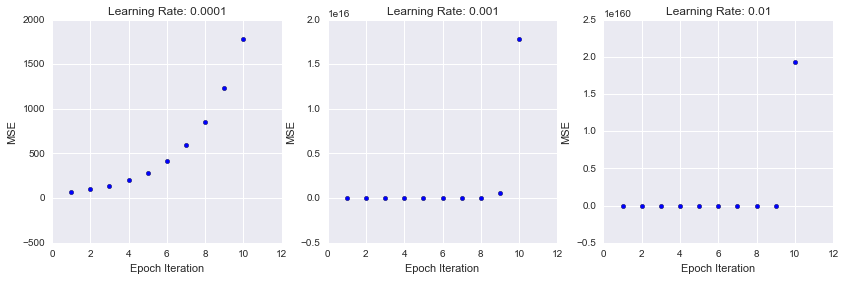

In [204]:
figure(figsize=(14,4))

subplot(131)
scatter(num_iters, MSE1_list)
title('Learning Rate: 0.0001')
xlabel('Epoch Iteration')
ylabel('MSE')

subplot(132)
scatter(num_iters, MSE2_list)
title('Learning Rate: 0.001')
xlabel('Epoch Iteration')
ylabel('MSE')

subplot(133)
scatter(num_iters, MSE3_list)
title('Learning Rate: 0.01')
xlabel('Epoch Iteration')
ylabel('MSE')

In [221]:
df_weights1 = DataFrame(weights1)
df_weights1.columns = ['w0', 'w1', 'w2', 'w3']

df_weights2 = DataFrame(weights2)
df_weights2.columns = ['w0', 'w1', 'w2', 'w3']

df_weights3 = DataFrame(weights3)
df_weights3.columns = ['w0', 'w1', 'w2', 'w3']

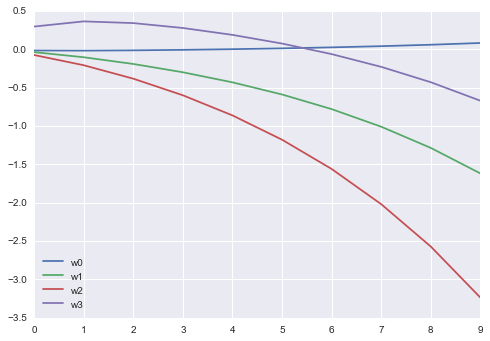

In [226]:
df_weights1.plot()

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

If we are using gradient descent and the starting point is between B and C, then we will not be able to find the local minima in this instance. Gradient descent works by iteratively updating the coefficients of some function to minimize the associated cost function. The formula that is used to update the coefficient $w$ is shown below:

$$ w = w - \alpha*\frac{\partial}{\partial w}J(w) $$

In this formula, $w$ represents the coefficient that is being updated, $\alpha$ represents the learning rate, and $J(w)$ represents the cost function. The change in the coefficient is directly proportional to the derivative of the cost function with respect to the coefficient. If we start between B and C, the derivative of the cost function with respect to $w$ is zero. Therefore, the second term in the above function is zero, and $w$ remains unchanged regardless of how many iterations are performed.

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

## 1. Split data into training and test set

In [119]:
train = data[-1050:-50]
X_train = train.drop('Direction', axis=1)
y_train = train['Direction']

test = data[-50:]
X_test = test.drop('Direction', axis=1)
y_test = test['Direction']

## 2. Train LDA, QDA, and Naive Bayes

In [120]:
# Train LDA model 
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_probs = LDA_model.predict_proba(X_test)

# Train QDA model
QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_probs = QDA_model.predict_proba(X_test)

# Traine Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_probs = NB_model.predict_proba(X_test)

In [121]:
def extract_probs(probs_array):
    probs_down = []
    probs_up = []
    for row in probs_array:
        probs_down.append(row[0])
        probs_up.append(row[1])
    
    return probs_up, probs_down

In [122]:
LDA_probsUp, LDA_probsDown = extract_probs(LDA_probs)
QDA_probsUp, QDA_probsDown = extract_probs(QDA_probs)
NB_probsUp, NB_probsDown = extract_probs(NB_probs)

LDA_probsUp[:5]

[0.50495138668713124,
 0.53888530608011354,
 0.54603080014781469,
 0.48018947654562905,
 0.50410137409817912]

## 3. Receiver operating characteristic (ROC) curves

In [123]:
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_test, LDA_probsUp, pos_label='Up')
QDA_fpr, QDA_tpr, QDA_thresholds = roc_curve(y_test, QDA_probsUp, pos_label='Up')
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_probsUp, pos_label='Up')

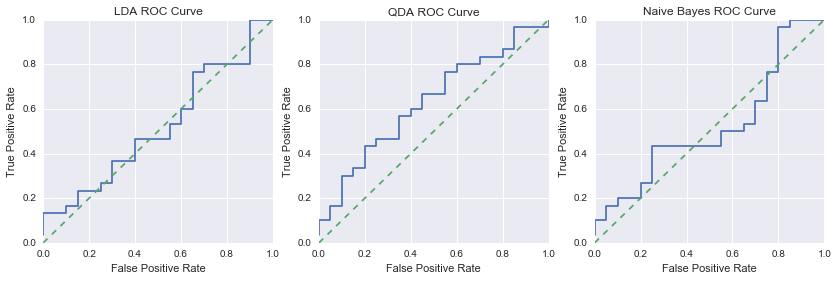

In [124]:
x = [0,1]
y = [0,1]

figure(figsize=(14,4))

subplot(131)
plot(LDA_fpr, LDA_tpr)
plot(x,y, ls='--')
title('LDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(132)
plot(QDA_fpr, QDA_tpr)
plot(x,y, ls='--')
title('QDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(133)
plot(NB_fpr, NB_tpr)
plot(x,y, ls='--')
title('Naive Bayes ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

## 4. Area under ROC curves

In [125]:
y_test_bin = []
for y in y_test:
    if y == 'Up':
        y_test_bin.append(1)
    else:
        y_test_bin.append(0)

In [126]:
LDA_auc = roc_auc_score(y_test_bin, LDA_probsUp)
QDA_auc = roc_auc_score(y_test_bin, QDA_probsUp)
NB_auc = roc_auc_score(y_test_bin, NB_probsUp)

In [127]:
print 'Area Under ROC Curve'
print
print 'LDA\t\t:\t%f' % (LDA_auc)
print 'QDA\t\t:\t%f' % (QDA_auc)
print 'Naive Bayes\t:\t%f' % (NB_auc)

Area Under ROC Curve

LDA		:	0.520000
QDA		:	0.628333
Naive Bayes	:	0.521667


## 5. Justify performance of each model

## 6. Use prior 100 points for training

In [129]:
train = data[-150:-50]
X_train = train.drop('Direction', axis=1)
y_train = train['Direction']

test = data[-50:]
X_test = test.drop('Direction', axis=1)
y_test = test['Direction']

In [130]:
# Train LDA model 
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_probs = LDA_model.predict_proba(X_test)

# Train QDA model
QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_probs = QDA_model.predict_proba(X_test)

# Traine Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_probs = NB_model.predict_proba(X_test)

# Extract probabilities
LDA_probsUp, LDA_probsDown = extract_probs(LDA_probs)
QDA_probsUp, QDA_probsDown = extract_probs(QDA_probs)
NB_probsUp, NB_probsDown = extract_probs(NB_probs)

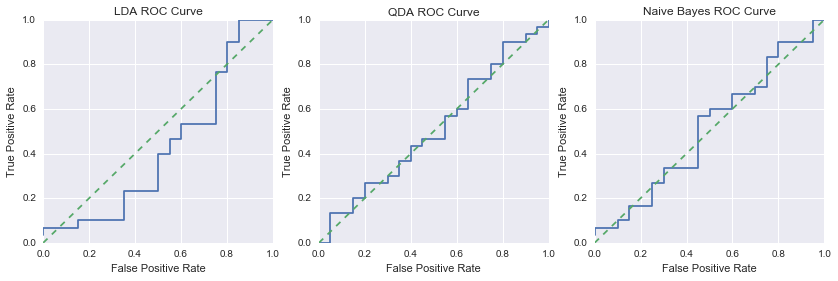

In [131]:
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_test, LDA_probsUp, pos_label='Up')
QDA_fpr, QDA_tpr, QDA_thresholds = roc_curve(y_test, QDA_probsUp, pos_label='Up')
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_probsUp, pos_label='Up')

x = [0,1]
y = [0,1]

figure(figsize=(14,4))

subplot(131)
plot(LDA_fpr, LDA_tpr)
plot(x,y, ls='--')
title('LDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(132)
plot(QDA_fpr, QDA_tpr)
plot(x,y, ls='--')
title('QDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(133)
plot(NB_fpr, NB_tpr)
plot(x,y, ls='--')
title('Naive Bayes ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

In [132]:
LDA_auc = roc_auc_score(y_test_bin, LDA_probsUp)
QDA_auc = roc_auc_score(y_test_bin, QDA_probsUp)
NB_auc = roc_auc_score(y_test_bin, NB_probsUp)

print 'Area Under ROC Curve'
print
print 'LDA\t\t:\t%f' % (LDA_auc)
print 'QDA\t\t:\t%f' % (QDA_auc)
print 'Naive Bayes\t:\t%f' % (NB_auc)

Area Under ROC Curve

LDA		:	0.421667
QDA		:	0.508333
Naive Bayes	:	0.508333


### Changes in Model Performance:

All three models (LDA, QDA, Naive Bayes) performed worse when using only the prior 100 points than they did when using the prior 1,000 points.

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [9]:
import pandas as pd
import numpy as np

from sklearn import model_selection
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, make_scorer
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## 1. Convert mpg to binary variable

In [3]:
Auto['mpg01'] = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)
Auto = Auto.drop('mpg', axis=1)
Auto.head(1)

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130.0,3504,12.0,70,1,0


## 2. Split data into training and test set

In [4]:
# Split data into training and test sets
train, test = model_selection.train_test_split(Auto, test_size = 0.33, random_state = 42)
 
X_train = train.drop('mpg01', axis=1)
y_train = train['mpg01']

X_test = test.drop('mpg01', axis=1)
y_test = test['mpg01']

## 3. Logistic regression with almost no regularization

In [5]:
# Fit logistic regression classifier to training set
logreg = LogisticRegression(penalty='l2', C=1e6)
logreg.fit(X_train, y_train)

# Use classifier to predict test set
logreg_predict = logreg.predict(X_test)

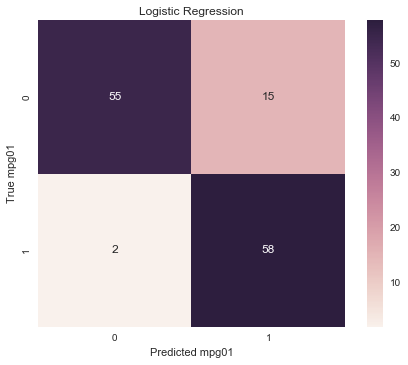

In [6]:
# Confustion matrix on test data
conf_mat = confusion_matrix(y_test, logreg_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Predicted mpg01')
plt.ylabel('True mpg01')
plt.title('Logistic Regression')

In [7]:
true_mpg0 = float(conf_mat[0][0])
false_mpg0 = float(conf_mat[1][0])
true_mpg1 = float(conf_mat[1][1])
false_mpg1 = float(conf_mat[0][1])

accuracy_mpg0 = true_mpg0 / (true_mpg0 + false_mpg1)
accuracy_mpg1 = true_mpg1 / (true_mpg1 + false_mpg0)

avgAcc_perClass = (accuracy_mpg1 + accuracy_mpg0)/2

In [116]:
print 'Class Accuracy'
print
print 'mpg01 = 0\t:\t%f' % (accuracy_mpg0)
print 'mpg01 = 1\t:\t%f' % (accuracy_mpg1)
print 'Average\t\t:\t%f' % (avgAcc_perClass)

Class Accuracy

mpg01 = 0	:	0.785714
mpg01 = 1	:	0.966667
Average		:	0.876190


## 4. l2 penalty, Cs of [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [10]:
def custom_scorer(y_true, y_predict):
    '''Takes true values of y and predicted values of y and returns average per class accuracy'''
    conf_mat = confusion_matrix(y_true, y_predict)
    
    true_neg = float(conf_mat[0][0])
    false_neg = float(conf_mat[1][0])
    true_pos = float(conf_mat[1][1])
    false_pos = float(conf_mat[0][1])
    
    accuracy_neg = true_neg / (true_neg + false_pos)
    accuracy_pos = true_pos / (true_pos + false_neg)
    
    avg_accuracy_perClass = (accuracy_pos + accuracy_neg)/2
    return avg_accuracy_perClass

In [29]:
# Define scoring function
score = make_scorer(custom_scorer, greater_is_better=True)
# Define parameter grid
parameters = {'C': [0.001,0.01, 0.1, 1, 10 ,100, 1000]}

# Fit logistic regression model with different parameters
logreg_cv = GridSearchCV(LogisticRegression(penalty='l2'), parameters, score)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(custom_scorer), verbose=0)

In [30]:
logreg_bestFit = logreg_cv.best_estimator_
logreg_bestScore = logreg_cv.best_score_
logreg_bestParams = logreg_cv.best_params_

In [134]:
print 'The logistic regression model performed best with C = %.1f.' % (logreg_bestParams['C'])
print 'This model produced an average per class accuracy of %f.' % (logreg_bestScore)

The logistic regression model performed best with C = 0.1.
This model produced an average per class accuracy of 0.922858.


## 5. l1 penalty, Cs of [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [35]:
# Fit logistic regression model with different parameters
logreg_cv2 = GridSearchCV(LogisticRegression(penalty='l1'), parameters, score)
logreg_cv2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(custom_scorer), verbose=0)

In [36]:
logreg_bestFit2 = logreg_cv2.best_estimator_
logreg_bestScore2 = logreg_cv2.best_score_
logreg_bestParams2 = logreg_cv2.best_params_

In [133]:
print 'The logistic regression model performed best with C = %.1f.' % (logreg_bestParams2['C'])
print 'This model produced an average per class accuracy of %f.' % (logreg_bestScore2)

The logistic regression model performed best with C = 0.1.
This model produced an average per class accuracy of 0.922858.


## 6. Compare models

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!